<a href="https://colab.research.google.com/github/ashkash2476/Assignemnt-2-TSAI/blob/master/Assignment2_code_TSAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


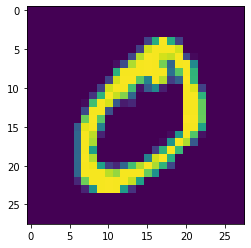

In [11]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 227us/step - loss: 0.3872 - acc: 0.9271 - val_loss: 0.0841 - val_acc: 0.9833
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 172us/step - loss: 0.1088 - acc: 0.9797 - val_loss: 0.0555 - val_acc: 0.9877
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 172us/step - loss: 0.0757 - acc: 0.9838 - val_loss: 0.0418 - val_acc: 0.9893
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 172us/step - loss: 0.0594 - acc: 0.9870 - val_loss: 0.0478 - val_acc: 0.9878
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [48]:
from keras.layers import Activation
model1 = Sequential()
 
model1.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False)) #26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(Convolution2D(20, 3, 3, activation='relu',use_bias=False)) #24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(MaxPooling2D(pool_size=(2, 2)))#12

model1.add(Convolution2D(10, 3, 3, activation='relu',use_bias=False))#10
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(20, 3, 3, activation='relu',use_bias=False))#8
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False))#6
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(MaxPooling2D(pool_size=(2, 2)))#3


model1.add(Convolution2D(10, 3, 3)) #1
model1.add(BatchNormalization())



model1.add(Flatten())
model1.add(Activation('softmax'))


model1.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_111 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_98 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 24, 24, 20)        1800      
_________________________________________________________________
batch_normalization_112 (Bat (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_99 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 20)      

In [49]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 19s 308us/step - loss: 0.3401 - acc: 0.9474 - val_loss: 0.0955 - val_acc: 0.9873
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 167us/step - loss: 0.0994 - acc: 0.9840 - val_loss: 0.0587 - val_acc: 0.9912
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 166us/step - loss: 0.0683 - acc: 0.9875 - val_loss: 0.0513 - val_acc: 0.9903
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 168us/step - loss: 0.0543 - acc: 0.9889 - val_loss: 0.0417 - val_acc: 0.9922
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [51]:

score = model1.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020409335430525245, 0.9951]
